<a href="https://colab.research.google.com/github/fatemehra10/weather-crawl-/blob/main/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [12]:
#Read data
weather = pd.read_csv('final_weathers.csv')
weather

,time,date,city,temp_mean,temp_max,temp_min,wind,wind_direction,humidity,barometer,visibility,weather
0,morning,1 December 2022,Shiraz,6.33,9.0,4.0,0.00,0.00,0.00,66.33,1019.67,Clear
1,midday,1 December 2022,Shiraz,18.33,21.0,15.0,2.00,2.00,40.00,31.33,1017.33,Passing clouds
2,night,1 December 2022,Shiraz,17.00,17.0,17.0,7.00,7.00,280.00,32.00,1018.00,Haze
3,morning,2 December 2022,Shiraz,6.33,9.0,4.0,0.00,0.00,0.00,67.00,1018.33,Clear
4,midday,2 December 2022,Shiraz,17.33,19.0,14.0,0.00,0.00,0.00,37.00,1015.00,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
22947,midday,30 January 2020,Mashhad,7.62,10.0,2.0,8.56,8.56,131.25,47.31,1015.50,Partly sunny
22948,night,30 January 2020,Mashhad,6.20,9.0,3.0,8.47,8.47,170.67,59.87,1016.33,Passing clouds
22949,morning,31 January 2020,Mashhad,0.44,1.0,-1.0,1.31,1.31,35.62,89.06,1016.25,Clear
22950,midday,31 January 2020,Mashhad,9.31,13.0,3.0,5.88,5.88,48.12,48.25,1015.44,Sunny


In [36]:
weather.date

0       2022-12-01
1       2022-12-01
2       2022-12-01
3       2022-12-02
4       2022-12-02
           ...    
22947   2020-01-30
22948   2020-01-30
22949   2020-01-31
22950   2020-01-31
22951   2020-01-31
Name: date, Length: 22657, dtype: datetime64[ns]

In [14]:
# Convert datatypes
weather.time = weather.time.astype('category')
weather.date = pd.to_datetime(weather.date)
weather.city = weather.city.astype('category')
weather.weather = weather.weather.astype('category')

In [15]:
# Clean data 
weather.weather = weather.weather.apply(lambda x: x.strip())

In [30]:
# Handle NAN
weather[weather.isna().any(axis = 1)]

,time,date,city,temp_mean,temp_max,temp_min,wind,wind_direction,humidity,barometer,visibility,weather


In [29]:
weather.dropna(inplace = True)

In [37]:
dict_weather = {
   'Scattered clouds' : 'Cloudy',
   'Overcast': 'Cloudy',
   'Broken clouds': 'Cloudy',
   'Mostly cloudy':'Cloudy',
   'More clouds than sun':'Cloudy',
   'Passing clouds' : 'Cloudy',
   'Partly sunny' : 'Sunny',
   'Haze':'Fog',
   'Ice fog' : 'Fog',
   'Light rain' : 'Rain',
   'Light snow' : 'Snow',
   'Scattered showers' : 'Rain',
   'Duststorm' : 'Storm',
   'Sandstorm' : 'Storm',
   'Sprinkles' : 'Rain',
   'Low clouds' : 'Cloudy',
    'Thunderstorms': 'Thunder',
    'Thundershowers' : 'Thunder',
    'Dense fog' : 'Fog',
    'Drizzle' : 'Rain',
    'Low level haze' : 'Fog',
    'Snow flurries' : 'Snow',    
    'Light mixture of precip' : 'Snow',
    'Light freezing rain' : 'Rain',
    'Rain showers' : 'Rain',
    'Heavy snow': 'Snow'
}



In [38]:
def clean_target(x):
  if x in dict_weather.keys():
    return dict_weather[x]
  else:
    return x

weather.weather = weather.weather.apply(clean_target)

In [39]:
pd.set_option('display.max_rows', 500)
weather.weather.value_counts()

Cloudy           8317
Clear            7283
Sunny            5034
Fog              1383
Partly cloudy     253
Rain              230
Storm              71
Snow               54
Thunder            32
Name: weather, dtype: int64

In [41]:
weather.to_csv('clean_weather.csv', index = False)

Text(0.5, 1.0, 'Hostogram weather')

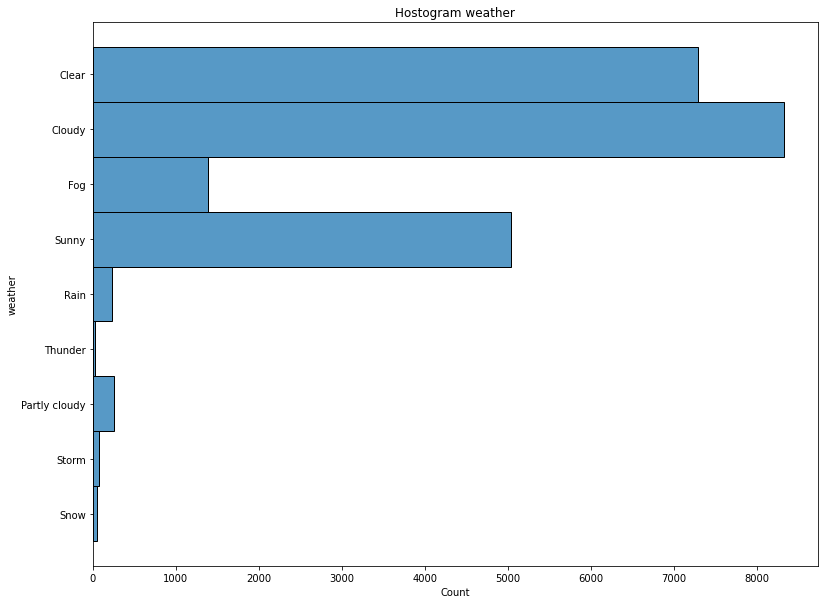

In [42]:
plt.figure(figsize=(13,10))
sns.histplot(data = weather , y = 'weather')
plt.title('Hostogram weather')


# Exploratory Analysis

# Reduction dimension

# Classification